In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt 

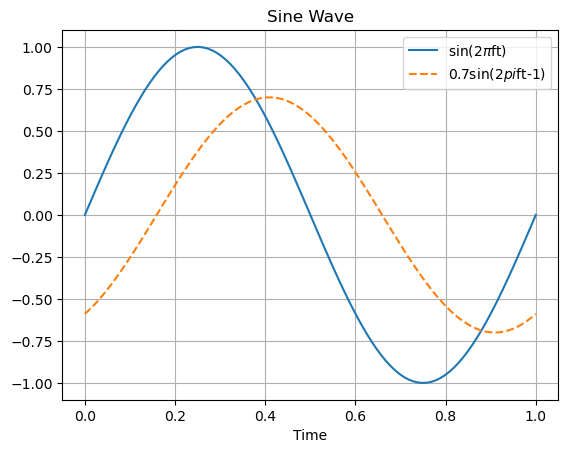

In [9]:
t = np.linspace(0,1,100) # 0~100 까지 간격을 나눈 시간 
f = 1 # 1Hz를 의미함 => 초당 사이클 초당 반복되는 사이클 수 

# phi 값이 0이라고 가정했을 때의 sine파 => 결과값은 실선으로 표시  
plt.plot(t, 1*np.sin(2*np.pi*f*t + 0),"-", label ='sin(2$\pi$ft)')
# phi 값이 -1이라고 가정했을 때의 sine파 => 결과값은 점선으로 표기 
plt.plot(t, 0.7*np.sin(2*np.pi*f*t -1), ls= "--", label='0.7sin(2$pi$ft-1)')

plt.xlabel("Time")
plt.title("Sine Wave")
plt.legend()
plt.grid()
plt.show()
# 직접 sine파를 사용해서 소리를 만들어 낼 수 있음. 

In [22]:
'''
audio 처리에서 시작, 끝 부분을 증가&감소 시키는 효과를 가르키는 fade_in, fade_out 효과를 적용시킨 함수.
data => audio 타입을 갖는다. 
'''
def fade_io(data, length):
    # 0~1 까지 선형적으로 증가하는 값 생성. 
    fade_in_data = np.linspace(0,1,length)
    # fade in 적용 
    data[:length] *= fade_in_data
    # 1-0 까지 선형적으로 감소하는 값 생성 
    fade_out_data = np.linspace(1,0,length)
    # Fade out 적용
    data[-length:] *= fade_out_data
    return data

In [27]:
"""
주파수 값과 실행시간을 인자로 받는 Sine톤 함수 
f: Sine톤 주파수 
duration : Sine 톤 실행시간(길이)를 의미함. 
n: Sine톤 샘플수 => 기본값이 1280 
"""
def sine_tone(f, duration, n = 1280):
    t = np.linspace(0, duration, n)
    data = np.sin(2*np.pi*f*t)
    length = 10**int(np.log10(duration*n))
    return fade_io(data = data, length = length)

In [41]:
from IPython.display import Audio 
Audio(sine_tone(100, duration=2, n=42100), rate=200000)